In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import itertools

import data.data
import interactions
import lattice
import importlib
importlib.reload(lattice)
importlib.reload(interactions)
importlib.reload(data.data)

<module 'data.data' from '/n/home10/jmcgreivy/LatticeNuclearModel/data/data.py'>

In [2]:
def get_interactions(a_mm_0, a_mm_1, a_mm_2, a_mm_3,
                     a_mp_0, a_mp_1, a_mp_2, a_mp_3,
                     a_pm_0, a_pm_1, a_pm_2, a_pm_3,
                             a_pp_1, a_pp_2, a_pp_3,
                     a_c_1, a_c_2):
    a_pp_0 = a_pp_1
    # Package into lists
    a_list_mm = [a_mm_0, a_mm_1, a_mm_2, a_mm_3,]
    a_list_mp = [a_mp_0, a_mp_1, a_mp_2, a_mp_3,]
    a_list_pm = [a_pm_0, a_pm_1, a_pm_2, a_pm_3,]
    a_list_pp = [a_pp_0, a_pp_1, a_pp_2, a_pp_3,]
    a_list_coulomb = [a_c_1, a_c_2]
    
    return interactions.get_nuclear_interaction(a_list_mm), interactions.get_nuclear_interaction(a_list_mp), interactions.get_nuclear_interaction(a_list_pm), interactions.get_nuclear_interaction(a_list_pp), interactions.get_coulomb_interaction(a_list_coulomb), interactions.build_full_interaction(a_list_mm, a_list_mp, a_list_pm, a_list_pp, a_list_coulomb)
    

In [3]:
best = {"target": -120.99314050376141, "params": {"a_c_1": 6.0, "a_c_2": 0.0005132715705130665, "a_mm_0": -5.837526610049708, "a_mm_1": 0.0, "a_mm_2": 0.0, "a_mm_3": 0.0, "a_mp_0": 0.0, "a_mp_1": 0.0, "a_mp_2": 0.0, "a_mp_3": 0.0, "a_pm_0": -5.958358129534872, "a_pm_1": 0.0, "a_pm_2": 0.0, "a_pm_3": 0.0, "a_pp_1": 0.0, "a_pp_2": 0.0, "a_pp_3": 0.0}, "datetime": {"datetime": "2024-07-14 17:22:10", "elapsed": 10754.722992, "delta": 23.512767}}

f_nuclear_mm, f_nuclear_mp, f_nuclear_pm, f_nuclear_pp, f_coulomb, f_full = get_interactions(**best["params"])

Text(0.5, 1.0, 'Coulomb Force')

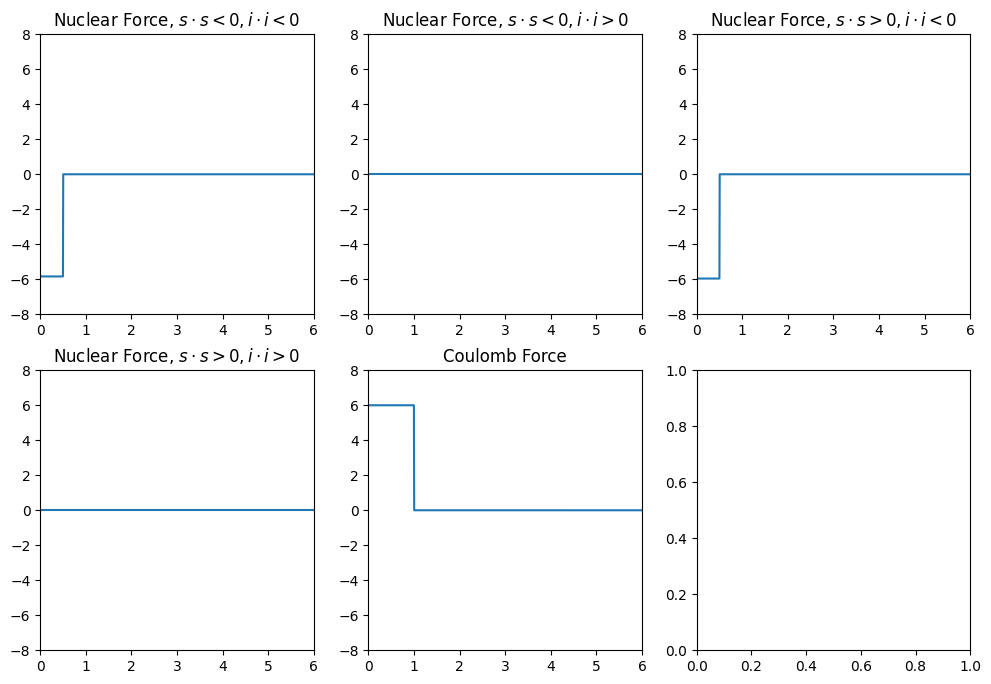

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

x = torch.linspace(0, 6, 1000)

y_lim = (-8, 8)
y_lim_c = (-8, 8)

axs[0,0].plot(x, f_nuclear_mm(x))
axs[0,0].set_ylim(*y_lim)
axs[0,0].set_xlim(0, 6)
axs[0,0].set_title("Nuclear Force, $s \cdot s < 0, i \cdot i < 0$")

axs[0,1].plot(x, f_nuclear_mp(x))
axs[0,1].set_ylim(*y_lim)
axs[0,1].set_xlim(0, 6)
axs[0,1].set_title("Nuclear Force, $s \cdot s < 0, i \cdot i > 0$")

axs[0,2].plot(x, f_nuclear_pm(x))
axs[0,2].set_ylim(*y_lim)
axs[0,2].set_xlim(0, 6)
axs[0,2].set_title("Nuclear Force, $s \cdot s > 0, i \cdot i < 0$")

axs[1,0].plot(x, f_nuclear_pp(x))
axs[1,0].set_ylim(*y_lim)
axs[1,0].set_xlim(0, 6)
axs[1,0].set_title("Nuclear Force, $s \cdot s > 0, i \cdot i > 0$")

axs[1,1].plot(x, f_coulomb(x))
axs[1,1].set_ylim(*y_lim_c)
axs[1,1].set_xlim(0, 6)
axs[1,1].set_title("Coulomb Force")

In [5]:
Z = 30
N = 30
V_interaction = f_full
device = "cpu"

lat = lattice.NuclearLattice(Z, N, V_interaction, boundaries=[[-6, 6], [-6, 6], [-6, 6]], device=device)

In [6]:
E_tot = torch.inf
while True:
    lat.step()
    E_tot_new = lat.E_tot()
    if E_tot_new < E_tot:
        E_tot = E_tot_new
        print(E_tot)
    elif E_tot_new > E_tot + 1e-6:
        print("ERROR")
    else:
        break

-527.6734619140625
